In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Import and create inspector
from sqlalchemy import inspect

In [11]:
inspector = inspect(engine)

In [13]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [16]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [18]:
# Earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [17]:
# Latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [19]:
# Find all the dates later than a year before the latest date (2016-08-23)
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

[('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'

# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
one_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(one_year, columns=['date', 'prcp'])

# Sort the dataframe by date
# df.set_index('date', inplace = True)

In [55]:
# Get the dates from the first column of the df
dates = df.iloc[:, 0]
print(dates)

0       2016-08-23
1       2016-08-23
2       2016-08-23
3       2016-08-23
4       2016-08-23
           ...    
2225    2017-08-22
2226    2017-08-23
2227    2017-08-23
2228    2017-08-23
2229    2017-08-23
Name: date, Length: 2230, dtype: object


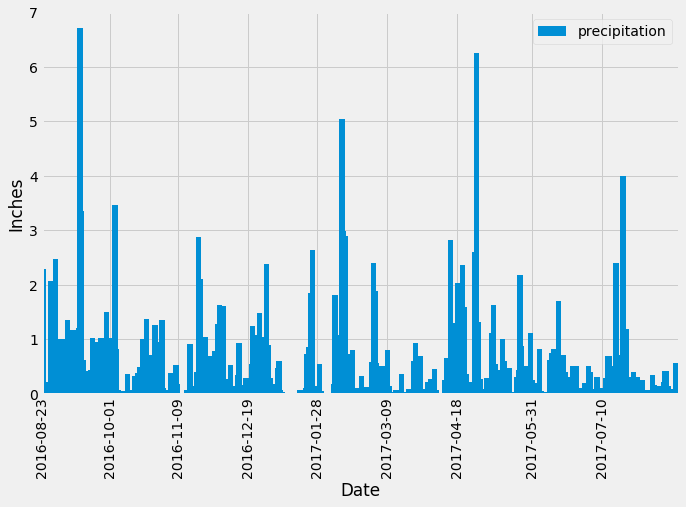

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(9.75,7.27))

# x-values will be dates, y-values will come from df's prcp column
plt.bar(dates, df['prcp'], width = 3)

# Set up labels, legend, axis scales, and xticks
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper right')
plt.axis(['2016-08-23', '2017-08-23', 0, 7])
plt.xticks(('2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'), rotation = "90")
plt.tight_layout()

# Save the graph
plt.savefig('./Images/precipitation.png', dpi = 100, format = 'png')

# Show the graph
plt.show()

In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [73]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Station).group_by(Station.station).count()
print(station_number)

9


In [97]:
# Join the Measurement and Station tables on 'station'; resulting table should have Station.name, Measurement.date,
# Measurement.prcp, and Measurement.tobs
sel = [Station.name, Measurement.date, Measurement.prcp, Measurement.tobs]
# joined = session.query(*sel).filter(Measurement.station == Station.station).limit(20).all()
Joined = session.query(*sel).filter(Measurement.station == Station.station).all()

# Print results, limit to an arbitrary number like 20
# for row in joined:
#     print(row)

In [133]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df2 = pd.DataFrame(Joined, columns = ['name', 'date', 'prcp', 'tobs'])
grouped = df2.groupby('name').count().sort_values(by = 'name', ascending = False)
grouped.sort_values(by = 'date', ascending = False)

# The station with the most observations is "WAIHEE 837.5, HI US"

,date,prcp,tobs
name,,,
"WAIHEE 837.5, HI US",2772,2772,2772
"WAIKIKI 717.2, HI US",2724,2685,2724
"KANEOHE 838.1, HI US",2709,2696,2709
"WAIMANALO EXPERIMENTAL FARM, HI US",2669,2572,2669
"MANOA LYON ARBO 785.2, HI US",2612,2484,2612
"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202,1937,2202
"HONOLULU OBSERVATORY 702.2, HI US",1979,1932,1979
"PEARL CITY, HI US",1372,683,1372
"UPPER WAHIAWA 874.3, HI US",511,342,511


In [154]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# WAIHEE 837.5 has a station name of USC00519281

most_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

<sqlalchemy.sql.functions.count at 0x72e3a3bcd0; count>

In [121]:
# grouped2 = df2.groupby('name')
# grouped2.describe()

prcp                           \
                                         count      mean       std  min   
name                                                                      
HONOLULU OBSERVATORY 702.2, HI US       1932.0  0.047971  0.244826  0.0   
KANEOHE 838.1, HI US                    2696.0  0.141921  0.433905  0.0   
KUALOA RANCH HEADQUARTERS 886.9, HI US  1937.0  0.121058  0.413812  0.0   
MANOA LYON ARBO 785.2, HI US            2484.0  0.429988  0.712999  0.0   
PEARL CITY, HI US                        683.0  0.063602  0.243931  0.0   
UPPER WAHIAWA 874.3, HI US               342.0  0.207222  0.508305  0.0   
WAIHEE 837.5, HI US                     2772.0  0.212352  0.543312  0.0   
WAIKIKI 717.2, HI US                    2685.0  0.049020  0.210583  0.0   
WAIMANALO EXPERIMENTAL FARM, HI US      2572.0  0.114961  0.410237  0.0   

                                                                       tobs  \
                                           25%   50%     75%    max   count   
name                                                                          
HONOLULU OBSERVATORY 702.2, HI US       0.0000  0.00  0.0100   4.00  1979.0   
KANEOHE 838.1, HI US                    0.0000  0.02  0.1000   7.65  2709.0   
KUALOA RANCH HEADQUARTERS 886.9, HI US  0.0000  0.02  0.1000  11.53  2202.0   
MANOA LYON ARBO 785.2, HI US            0.0100  0.16  0.5400   8.06  2612.0   
PEARL CITY, HI US                       0.0000  0.00  0.0200   2.80  1372.0   
UPPER WAHIAWA 874.3, HI US              0.0025  0.03  0.1975   6.30   511.0   
WAIHEE 837.5, HI US                     0.0000  0.04  0.1900   9.64  2772.0   
WAIKIKI 717.2, HI US                    0.0000  0.00  0.0200   4.20  2724.0   
WAIMANALO EXPERIMENTAL FARM, HI US      0.0000  0.00  0.0700   6.38  2669.0   

                                                                               \
                                             mean       std   min   25%   50%   
name                                                                            
HONOLULU OBSERVATORY 702.2, HI US       71.615968  5.476309  53.0  68.0  72.0   
KANEOHE 838.1, HI US                    72.689184  3.624668  59.0  70.0  73.0   
KUALOA RANCH HEADQUARTERS 886.9, HI US  74.873297  3.812367  58.0  72.0  75.0   
MANOA LYON ARBO 785.2, HI US            70.915008  3.523904  58.0  69.0  71.0   
PEARL CITY, HI US                       74.684402  4.383041  58.0  72.0  75.0   
UPPER WAHIAWA 874.3, HI US              72.724070  4.144946  58.0  70.0  73.0   
WAIHEE 837.5, HI US                     71.663781  4.357642  54.0  69.0  72.0   
WAIKIKI 717.2, HI US                    74.553231  4.629627  56.0  72.0  76.0   
WAIMANALO EXPERIMENTAL FARM, HI US      74.543649  4.323161  56.0  72.0  75.0   

                                                    
                                         75%   max  
name                                                
HONOLULU OBSERVATORY 702.2, HI US       75.0  87.0  
KANEOHE 838.1, HI US                    75.0  85.0  
KUALOA RANCH HEADQUARTERS 886.9, HI US  78.0  85.0  
MANOA LYON ARBO 785.2, HI US            73.0  84.0  
PEARL CITY, HI US                       78.0  87.0  
UPPER WAHIAWA 874.3, HI US              76.0  83.0  
WAIHEE 837.5, HI US                     74.0  85.0  
WAIKIKI 717.2, HI US                    78.0  87.0  
WAIMANALO EXPERIMENTAL FARM, HI US      77.0  85.0

In [172]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df3 = pd.DataFrame(most_obs, columns = ['date', 'tobs'])
df3.describe()

# Lowest temperature recorded is 59, highest temperature is 83, and average is 73.

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [177]:
# Group by temperature
group_df3 = df3.groupby('tobs')
group_df3.describe()

date                        
     count unique         top freq
tobs                              
59.0     3      3  2017-02-08    1
60.0     2      2  2017-02-03    1
61.0     1      1  2017-02-25    1
62.0     6      6  2017-03-07    1
63.0     4      4  2017-01-04    1
64.0     3      3  2017-03-08    1
65.0     7      7  2017-02-16    1
66.0     5      5  2017-03-16    1
67.0    15     15  2017-05-09    1
68.0    12     12  2017-03-29    1
69.0    19     19  2017-01-13    1
70.0    22     22  2017-02-20    1
71.0    18     18  2017-04-05    1
72.0    22     22  2017-06-20    1
73.0    18     18  2017-06-26    1
74.0    39     39  2017-03-19    1
75.0    33     33  2017-04-02    1
76.0    33     33  2017-03-27    1
77.0    31     31  2017-05-14    1
78.0    22     22  2016-08-29    1
79.0    18     18  2017-07-01    1
80.0    11     11  2016-09-02    1
81.0     4      4  2017-07-02    1
82.0     3      3  2017-07-23    1
83.0     1      1  2017-08-06    1

In [ ]:
# Set x values
x_values_2 = group_df3

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
